# Imports

In [1]:
import urllib.request, json
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import math
import datetime
import pickle
import math
import collections
from tqdm import tqdm
import time

# Queries

## Get the sites

### Get a list of allUK sites

Download information about all sites in the UK.

In [3]:
url_text = "https://webtris.highwaysengland.co.uk/api/v1/sites"
with urllib.request.urlopen(url_text) as url:
    data = json.loads(url.read().decode())
    
sites = data['sites']
sites[0]

{'Id': '1',
 'Name': 'MIDAS site at M4/2295A2 priority 1 on link 105009001; GPS Ref: 502816;178156; Westbound',
 'Description': 'M4/2295A2',
 'Longitude': -0.520379557723297,
 'Latitude': 51.4930115367112,
 'Status': 'Inactive'}

### Filter onto Areas

Next we are going to filter onto our train and test areas via coordinates.

The train area is Birmingham and the test area is Cambridge.

In [4]:
def get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date='01062021',
                     end_date = '15062022',
                     quality_threshold = 40):
    
    # Convert sites query into df and filter onto our area
    sites_df = pd.DataFrame(data = sites)
    area_sites_df = sites_df.loc[(min_long < sites_df.Longitude) & (sites_df.Longitude < max_long)
                                & (min_lat < sites_df.Latitude) & (sites_df.Latitude < max_lat)]
    area_sites_df = area_sites_df.reset_index(drop=True)
    area_ids = list(area_sites_df.Id)
    
    # Next filter onto sites with good quality data:
    quality_responces = []
    for site_id in tqdm(area_ids):
        url_text = f"https://webtris.highwaysengland.co.uk/api/v1/quality/overall?sites={site_id}&start_date={start_date}&end_date={end_date}"
        with urllib.request.urlopen(url_text) as url:
            responce = json.loads(url.read().decode())
        quality_responces.append(responce)
        
    # We only want sites with quality greater than threshold
    good_quality_ids = []
    for responce in quality_responces:
        if responce['data_quality'] >= quality_threshold:
            good_quality_ids.append(responce['sites'])

    quality_area_sites_df = area_sites_df.loc[area_sites_df.Id.isin(good_quality_ids)]
    quality_area_sites_df = quality_area_sites_df.reset_index(drop=True)
    
    return quality_area_sites_df

In [5]:
## TEMP PARTIL REBUILD ##
# Specify dates
start_date='19042019'
end_date = '19042019'
# Specify the train area we are looking at
max_lat = 53.51
max_long = -2.31
min_lat = 53.44 
min_long = -2.39
manc_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)
# Specify dates
# ddmmyy
start_date='08032022'
end_date = '08032022'
# Specify the train area we are looking at
max_lat = 51.43
max_long = -0.50
min_lat = 51.38
min_long = -0.57
quality_threshold = 40
# Get the quality reports
thorpe_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)
# Specify dates
# ddmmyy
start_date='08032022'
end_date = '08032022'
# Specify the train area we are looking at
max_lat = 51.72
max_long = 0.15
min_lat = 51.62
min_long = 0.09
quality_threshold = 40
# Get the quality reports
epping_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)
# Specify dates
# ddmmyy
start_date='08082020'
end_date = '08082020'
# Specify the train area we are looking at
max_lat = 51.60
max_long = -2.52
min_lat = 51.52
min_long = -2.59
# Get the quality reports
bristol_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)

100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:19<00:00,  7.62it/s]


In [44]:
# Specify dates
start_date='01062021'
end_date = '15062022'
# Specify the train area we are looking at
max_lat = 52.50
max_long = -1.67
min_lat = 52.42
min_long = -1.75
birmingham_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)
# Specify dates
start_date='19042019'
end_date = '19042019'
# Specify the train area we are looking at
max_lat = 53.51
max_long = -2.31
min_lat = 53.44 
min_long = -2.39
manc_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)
# Specify dates
# ddmmyy
start_date='02112021'
end_date = '02112021'
# Specify the train area we are looking at
max_lat = 52.25
max_long = 0.11
min_lat = 52.19
min_long = 0.02
# Get the quality reports
cam_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)
# Specify dates
# ddmmyy
start_date='08032022'
end_date = '08032022'
# Specify the train area we are looking at
max_lat = 51.43
max_long = -0.50
min_lat = 51.38
min_long = -0.57
quality_threshold = 40
# Get the quality reports
thorpe_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)
# Specify dates
# ddmmyy
start_date='08032022'
end_date = '08032022'
# Specify the train area we are looking at
max_lat = 51.72
max_long = 0.15
min_lat = 51.62
min_long = 0.09
quality_threshold = 40
# Get the quality reports
epping_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)

# Specify dates
# ddmmyy
start_date='08082020'
end_date = '08082020'
# Specify the train area we are looking at
max_lat = 51.60
max_long = -2.52
min_lat = 51.52
min_long = -2.59
# Get the quality reports
bristol_sites_df = get_quality_area(sites,
                     max_lat,
                     max_long,
                     min_lat,
                     min_long,
                     start_date,
                     end_date)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:10<00:00, 11.78it/s]


### Export the site dataframes

In [6]:
## TEMP PARTIAL REBUILD
manc_sites_df.to_feather('site_df/manc_sites_df')
thorpe_sites_df.to_feather('site_df/thorpe_sites_df')
epping_sites_df.to_feather('site_df/epping_sites_df')
bristol_sites_df.to_feather('site_df/bristol_sites_df')

In [45]:
birmingham_sites_df.to_feather('site_df/birmingham_sites_df')
manc_sites_df.to_feather('site_df/manc_sites_df')
cam_sites_df.to_feather('site_df/cam_sites_df')
thorpe_sites_df.to_feather('site_df/thorpe_sites_df')
epping_sites_df.to_feather('site_df/epping_sites_df')
bristol_sites_df.to_feather('site_df/bristol_sites_df')

### Import the site dataframes

In [13]:
birmingham_sites_df = pd.read_feather('site_df/birmingham_sites_df')
manc_sites_df = pd.read_feather('site_df/manc_sites_df')
cam_sites_df = pd.read_feather('site_df/cam_sites_df')
thorpe_sites_df = pd.read_feather('site_df/thorpe_sites_df')
epping_sites_df = pd.read_feather('site_df/epping_sites_df')
bristol_sites_df = pd.read_feather('site_df/bristol_sites_df')

### Export the sites to a GDF

In [8]:
import geopandas

def df_to_gdf(df):
    gdf = geopandas.GeoDataFrame(
        df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
    return gdf

In [9]:
birmingham_sites_gdf = df_to_gdf(birmingham_sites_df)
manc_sites_gdf = df_to_gdf(manc_sites_df)
cam_sites_gdf = df_to_gdf(cam_sites_df)
thorpe_sites_gdf = df_to_gdf(thorpe_sites_df)
epping_sites_gdf = df_to_gdf(epping_sites_df)
bristol_sites_gdf = df_to_gdf(bristol_sites_df)

In [10]:
birmingham_sites_gdf.to_file("site_df/geojson/birmingham_sites_gdf.geojson", driver='GeoJSON')
manc_sites_gdf.to_file("site_df/geojson/manc_sites_gdf.geojson", driver='GeoJSON')
cam_sites_gdf.to_file("site_df/geojson/cam_sites_gdf.geojson", driver='GeoJSON')
thorpe_sites_gdf.to_file("site_df/geojson/thorpe_sites_gdf.geojson", driver='GeoJSON')
epping_sites_gdf.to_file("site_df/geojson/epping_sites_gdf.geojson", driver='GeoJSON')
bristol_sites_gdf.to_file("site_df/geojson/bristol_sites_gdf.geojson", driver='GeoJSON')

## Get Reports

### Download the reports

In [109]:
def daily_report_query_url(site_id, page_num, start_date = '15062021', end_date = '15062022'):
    query_url = f"https://webtris.highwaysengland.co.uk/api/v1/reports/Daily?sites={site_id}&start_date={start_date}&end_date={end_date}&page={page_num}&page_size=10000"
    return query_url


# Function gets the report for a particular site_id
def get_site_report(site_id, start_date='15062021', end_date='15062022'):
    # Download page 1
    report_url = daily_report_query_url(site_id, 1, start_date, end_date)
    with urllib.request.urlopen(report_url) as url:
        report_page = json.loads(url.read().decode())
        
    # Work out how many pages are required    
    header = report_page['Header']
    rows = report_page['Rows']
    row_count = header['row_count']
    total_pages = math.ceil(row_count / 10000)
    # Make a dataframe of the rows so dar
    report_df = pd.DataFrame(data = rows)
    
    for i in range(2, total_pages+1):
        # Get page i of the report
        report_url = daily_report_query_url(site_id, i, start_date, end_date)
        with urllib.request.urlopen(report_url) as url:
            report_page = json.loads(url.read().decode())
        
        rows = report_page['Rows']
        current_page_df = pd.DataFrame(data = rows)
        report_df = pd.concat([report_df, current_page_df], ignore_index=True)

    return report_df, header

# Function takes a dataframe of site_df and gets the reports
def get_reports_from_sites_df(sites_df, start_date, end_date):
    # Get the reports on the site
    train_reports =  collections.defaultdict(str)
    # Go through all the site ids and get reports
    for site_id in tqdm(sites_df.Id):
        report, header = get_site_report(site_id, start_date, end_date)
        report['site_id'] = site_id
        train_reports[site_id] = report
        
    # Combine reports into one df
    report_df = pd.concat(list(train_reports.values()), ignore_index=True)
    return report_df

In [ ]:
# Take the start and end dates as the maximum and minima of the datas + a month
start_date='19032019'
end_date = '08042022'

birmingham_report_df = get_reports_from_sites_df(birmingham_sites_df, start_date, end_date)
birmingham_report_df.to_feather('traffic_reports/birmingham_report_df')

manc_report_df = get_reports_from_sites_df(manc_sites_df, start_date, end_date)
manc_report_df.to_feather('traffic_reports/manc_report_df')

cam_report_df = get_reports_from_sites_df(cam_sites_df, start_date, end_date)
cam_report_df.to_feather('traffic_reports/cam_report_df')

thorpe_report_df = get_reports_from_sites_df(thorpe_sites_df, start_date, end_date)
thorpe_report_df.to_feather('traffic_reports/thorpe_report_df')

epping_report_df = get_reports_from_sites_df(epping_sites_df, start_date, end_date)
epping_report_df.to_feather('traffic_reports/epping_report_df')

bristol_report_df = get_reports_from_sites_df(bristol_sites_df, start_date, end_date)
bristol_report_df.to_feather('traffic_reports/bristol_report_df')

 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                  | 32/64 [1:19:51<7:30:59, 845.61s/it]

### Import reports

In [2]:
birmingham_report_df = pd.read_feather('traffic_reports/birmingham_report_df')
manc_report_df = pd.read_feather('traffic_reports/manc_report_df')
cam_report_df = pd.read_feather('traffic_reports/cam_report_df')
thorpe_report_df = pd.read_feather('traffic_reports/thorpe_report_df')
epping_report_df = pd.read_feather('traffic_reports/epping_report_df')
bristol_report_df = pd.read_feather('traffic_reports/bristol_report_df')

## Data Cleaning

### Reformat col names

In [3]:
clean_col_names = [
    'site_name',
    'report_date',
    'time_period_ending',
    'time_interval',
    '0-520cm',
    '521-660cm',
    '661-1160cm',
    '1160+cm',
    '0-10mph',
    '11-15mph',
    '16-20mph',
    '21-25mph',
    '26-30mph',
    '31-35mph',
    '36-40mph',
    '41-45mph',
    '46-50mph',
    '51-55mph',
    '56-60mph',
    '61-70mph',
    '71-80mph',
    '80+mph',
    'avg_mph',
    'total_volume',
    'site_id'
]

In [4]:
birmingham_report_df.columns = clean_col_names
manc_report_df.columns = clean_col_names
cam_report_df.columns = clean_col_names
thorpe_report_df.columns = clean_col_names
epping_report_df.columns = clean_col_names
bristol_report_df.columns = clean_col_names

In [5]:
clean_cols = [
     'site_name',
     'site_id',
     'report_date',
     'time_period_ending',
     'time_interval',
     '0-520cm',
     '521-660cm',
     '661-1160cm',
     '1160+cm',
     'avg_mph',
     'total_volume']

In [6]:
clean_birmingham_report_df = birmingham_report_df[clean_cols]
clean_manc_report_df = manc_report_df[clean_cols]
clean_cam_report_df = cam_report_df[clean_cols]
clean_thorpe_report_df = thorpe_report_df[clean_cols]
clean_epping_report_df = epping_report_df[clean_cols]
clean_bristol_report_df = bristol_report_df[clean_cols]

In [7]:
# Specify which cols are to be converted to numerical data
interger_cols = [
     '0-520cm',
     '521-660cm',
     '661-1160cm',
     '1160+cm',
     'total_volume']

### Remove empty cols and convert to interger

In [8]:
def remove_rows(df):
    df = df.loc[df['total_volume'] != '']
    # Remove sites where the volume is always zero
    x = df.groupby('site_id')['total_volume'].nunique()
    zero_sites = list(x[x==1].index)
    df = df.loc[~df.site_id.isin(zero_sites)]
    df[interger_cols] = df[interger_cols].astype('int32')
    return df

clean_birmingham_report_df = remove_rows(clean_birmingham_report_df)
clean_manc_report_df = remove_rows(clean_manc_report_df)
clean_cam_report_df = remove_rows(clean_cam_report_df)
clean_thorpe_report_df = remove_rows(clean_thorpe_report_df)
clean_epping_report_df = remove_rows(clean_epping_report_df)
clean_bristol_report_df = remove_rows(clean_bristol_report_df)

In [9]:
clean_bristol_report_df.total_volume

233        450
234        330
235        362
236        364
237        325
          ... 
9304063    147
9304064    130
9304065    113
9304066    100
9304067     94
Name: total_volume, Length: 6745024, dtype: int32

### Add timestamp and Export

In [10]:
def get_timestamp(row):
    year, month,day = row['report_date'].split('T')[0].split('-')
    hour, minute, second = row['time_period_ending'].split(':')
    return datetime.datetime(int(year),int(month),int(day), int(hour), int(minute))

def add_time_data(clean_report):
    clean_report.loc[:,'timestamp'] = clean_report.apply(get_timestamp,axis=1)
    clean_report.loc[:,'hour'] = clean_report.timestamp.dt.hour.astype(str)
    clean_report.loc[:,'DOW'] =  clean_report.timestamp.dt.day_of_week.astype(str)
    clean_report.loc[:,'month'] = clean_report.timestamp.dt.month.astype(str)
    return clean_report

# clean_test_report_df = add_time_data(clean_test_report_df)
# clean_train_report_df = add_time_data(clean_train_report_df)

In [11]:
clean_birmingham_report_df = add_time_data(clean_birmingham_report_df)
clean_birmingham_report_df.reset_index(drop=True).to_feather('traffic_reports/clean/clean_birmingham_report_df')

clean_manc_report_df = add_time_data(clean_manc_report_df)
clean_manc_report_df.reset_index(drop=True).to_feather('traffic_reports/clean/clean_manc_report_df')

clean_cam_report_df = add_time_data(clean_cam_report_df)
clean_cam_report_df.reset_index(drop=True).to_feather('traffic_reports/clean/clean_cam_report_df')

clean_thorpe_report_df = add_time_data(clean_thorpe_report_df)
clean_thorpe_report_df.reset_index(drop=True).to_feather('traffic_reports/clean/clean_thorpe_report_df')

clean_epping_report_df = add_time_data(clean_epping_report_df)
clean_epping_report_df.reset_index(drop=True).to_feather('traffic_reports/clean/clean_epping_report_df')

clean_bristol_report_df = add_time_data(clean_bristol_report_df)
clean_bristol_report_df.reset_index(drop=True).to_feather('traffic_reports/clean/clean_bristol_report_df')

### Import clean reports

In [2]:
clean_birmingham_report_df = pd.read_feather('traffic_reports/clean/clean_birmingham_report_df')
clean_manc_report_df = pd.read_feather('traffic_reports/clean/clean_manc_report_df')
clean_cam_report_df = pd.read_feather('traffic_reports/clean/clean_cam_report_df')
clean_thorpe_report_df = pd.read_feather('traffic_reports/clean/clean_thorpe_report_df')
clean_epping_report_df = pd.read_feather('traffic_reports/clean/clean_epping_report_df')
clean_bristol_report_df = pd.read_feather('traffic_reports/clean/clean_bristol_report_df')

clean_birmingham_report_df['location'] = 'birmingham'
clean_manc_report_df['location'] = 'manchester'
clean_cam_report_df['location'] = 'cambridge'
clean_thorpe_report_df['location'] = 'thorpe'
clean_epping_report_df['location'] = 'epping'
clean_bristol_report_df['location'] = 'bristol'

In [3]:
clean_bristol_report_df.total_volume

0          450
1          330
2          362
3          364
4          325
          ... 
6745019    147
6745020    130
6745021    113
6745022    100
6745023     94
Name: total_volume, Length: 6745024, dtype: int32

### Export as one full report

In [4]:
full_clean_report = pd.concat([clean_birmingham_report_df, clean_manc_report_df, clean_cam_report_df, clean_thorpe_report_df, clean_epping_report_df, clean_bristol_report_df], ignore_index=True)

In [5]:
full_clean_report.to_feather('traffic_reports/clean/full_clean_report')

### Import Full report

In [2]:
full_clean_report = pd.read_feather('traffic_reports/clean/full_clean_report')

In [6]:
full_clean_report[(full_clean_report.timestamp.dt.year == 2022) & 
                  (full_clean_report.timestamp.dt.month == 3) & 
                  (full_clean_report.timestamp.dt.day == 8) &
                  (full_clean_report.site_id == '3798')]

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,location
17842531,M11/6237A,3798,2022-03-08T00:00:00,00:14:00,0,48,1,0,4,67,53,2022-03-08 00:14:00,0,1,3,epping
17842532,M11/6237A,3798,2022-03-08T00:00:00,00:29:00,1,51,1,5,1,66,58,2022-03-08 00:29:00,0,1,3,epping
17842533,M11/6237A,3798,2022-03-08T00:00:00,00:44:00,2,30,1,3,1,70,35,2022-03-08 00:44:00,0,1,3,epping
17842534,M11/6237A,3798,2022-03-08T00:00:00,00:59:00,3,24,0,2,3,67,29,2022-03-08 00:59:00,0,1,3,epping
17842535,M11/6237A,3798,2022-03-08T00:00:00,01:14:00,4,19,0,0,6,64,25,2022-03-08 01:14:00,1,1,3,epping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17842622,M11/6237A,3798,2022-03-08T00:00:00,22:59:00,91,102,0,3,5,69,110,2022-03-08 22:59:00,22,1,3,epping
17842623,M11/6237A,3798,2022-03-08T00:00:00,23:14:00,92,63,2,2,3,67,70,2022-03-08 23:14:00,23,1,3,epping
17842624,M11/6237A,3798,2022-03-08T00:00:00,23:29:00,93,20,0,0,0,69,20,2022-03-08 23:29:00,23,1,3,epping
17842625,M11/6237A,3798,2022-03-08T00:00:00,23:44:00,94,1,0,0,0,61,1,2022-03-08 23:44:00,23,1,3,epping


In [7]:
full_clean_report.total_volume

0            49
1            36
2            29
3            43
4            49
           ... 
26905477    147
26905478    130
26905479    113
26905480    100
26905481     94
Name: total_volume, Length: 26905482, dtype: int32

### Some exploratory plots of each regional dataset

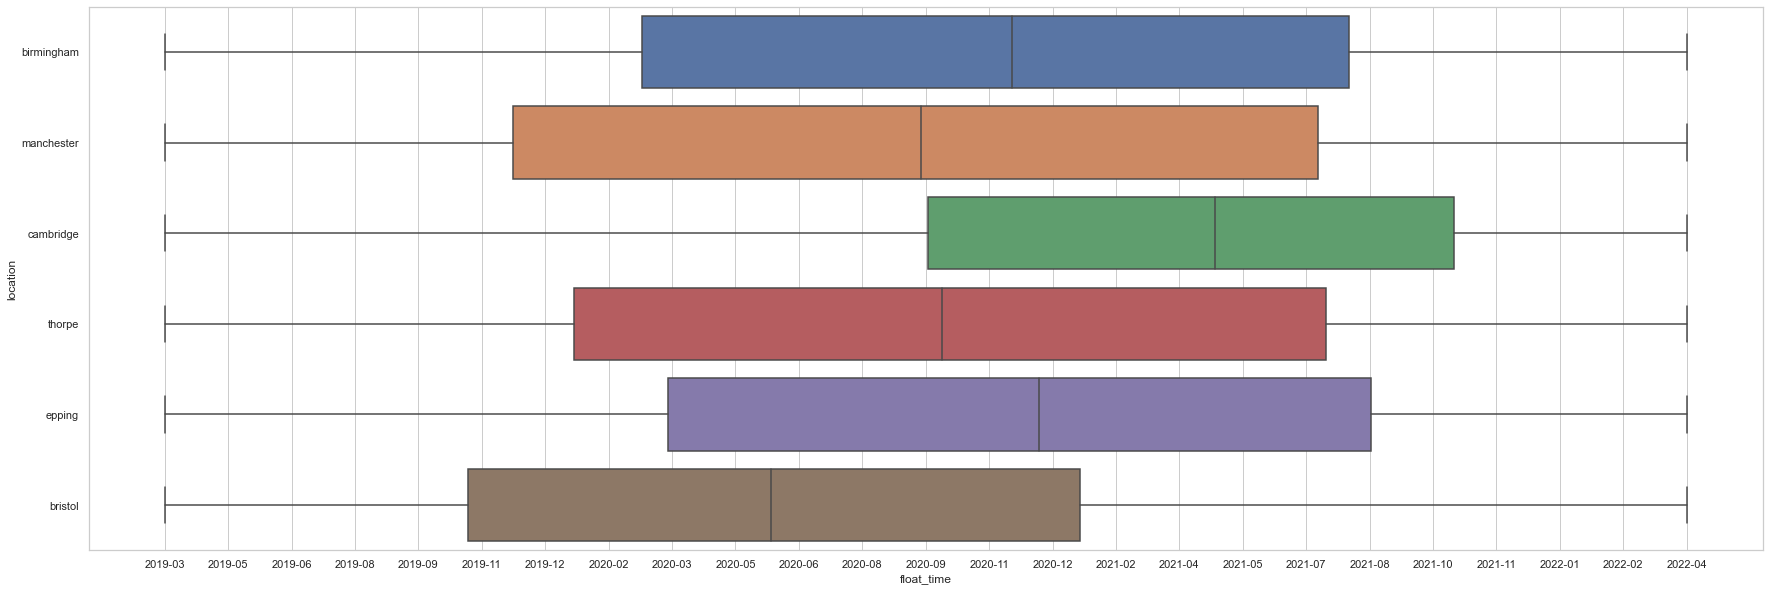

In [8]:
import seaborn as sns
# import matplotlib.ticker as ticker
import numpy as np

full_clean_report['float_time'] = full_clean_report.timestamp.astype(int)/1E9

@plt.FuncFormatter
def convert_to_date_string(x,pos):
    return time.strftime('%Y-%m',time.localtime(x))

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data = full_clean_report, x = 'float_time', y="location")
ax.xaxis.set_major_formatter(convert_to_date_string)
ax.xaxis.set_ticks(np.linspace(full_clean_report.float_time.min(), full_clean_report.float_time.max() , 25))
plt.show()

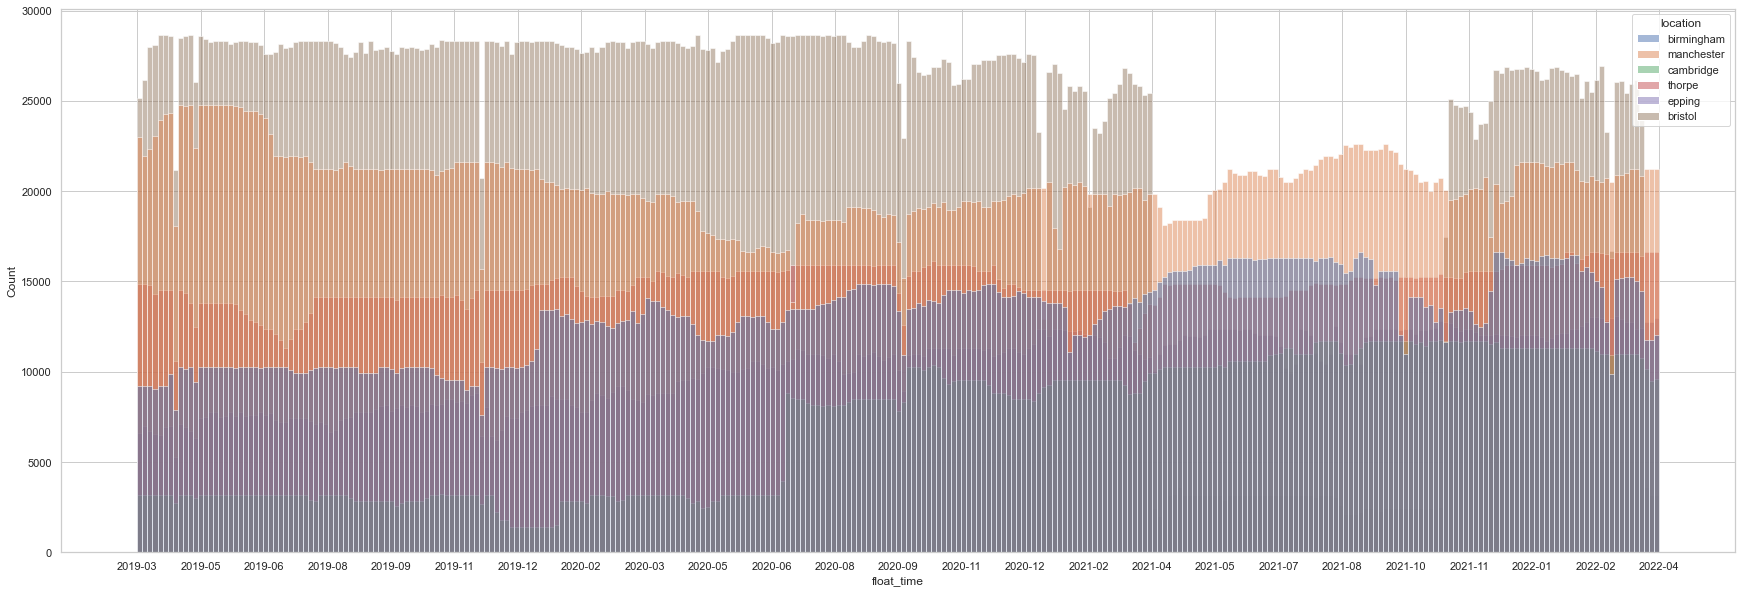

In [17]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.histplot(data=full_clean_report, x = 'float_time', hue="location")
ax.xaxis.set_major_formatter(convert_to_date_string)
ax.xaxis.set_ticks(np.linspace(full_clean_report.float_time.min(), full_clean_report.float_time.max() , 25))
plt.show()

### Normalise Counts for each site ID

In [9]:
def normalise(clean_report):
    for name in interger_cols:
        new_name = f"{name}_normalised"
        mean = clean_report.groupby('site_id')[name].transform("mean")
        clean_report.loc[:, new_name] = clean_report[name] / mean
    return clean_report


# Specify which cols are to be converted to numerical data
interger_cols = [
     '0-520cm',
     '521-660cm',
     '661-1160cm',
     '1160+cm',
     'total_volume']

full_clean_report_norm = normalise(full_clean_report)

In [10]:
full_clean_report_norm

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,...,hour,DOW,month,location,float_time,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
0,M42/6482L,175,2019-03-19T00:00:00,00:14:00,0,19,4,8,18,62,...,0,1,3,birmingham,1.552954e+09,0.154378,0.126290,0.539276,1.035132,0.262072
1,M42/6482L,175,2019-03-19T00:00:00,00:29:00,1,7,4,8,17,57,...,0,1,3,birmingham,1.552955e+09,0.056876,0.126290,0.539276,0.977625,0.192543
2,M42/6482L,175,2019-03-19T00:00:00,00:44:00,2,13,3,5,8,61,...,0,1,3,birmingham,1.552956e+09,0.105627,0.094717,0.337048,0.460059,0.155104
3,M42/6482L,175,2019-03-19T00:00:00,00:59:00,3,17,2,4,20,59,...,0,1,3,birmingham,1.552957e+09,0.138127,0.063145,0.269638,1.150147,0.229982
4,M42/6482L,175,2019-03-19T00:00:00,01:14:00,4,15,6,12,16,61,...,1,1,3,birmingham,1.552958e+09,0.121877,0.189435,0.808914,0.920117,0.262072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26905477,5275/1,7486,2022-04-08T00:00:00,22:59:00,91,125,3,3,16,56,...,22,4,4,bristol,1.649459e+09,0.446043,0.149869,0.186846,0.794521,0.436910
26905478,5275/1,7486,2022-04-08T00:00:00,23:14:00,92,113,6,3,8,57,...,23,4,4,bristol,1.649460e+09,0.403223,0.299738,0.186846,0.397260,0.386383
26905479,5275/1,7486,2022-04-08T00:00:00,23:29:00,93,97,1,5,10,55,...,23,4,4,bristol,1.649461e+09,0.346129,0.049956,0.311410,0.496576,0.335856
26905480,5275/1,7486,2022-04-08T00:00:00,23:44:00,94,84,3,4,9,55,...,23,4,4,bristol,1.649461e+09,0.299741,0.149869,0.249128,0.446918,0.297218


In [11]:
full_clean_report_norm.to_feather('traffic_reports/clean/full_clean_report_norm')

### New Check Plots

<AxesSubplot:xlabel='timestamp', ylabel='total_volume_normalised'>

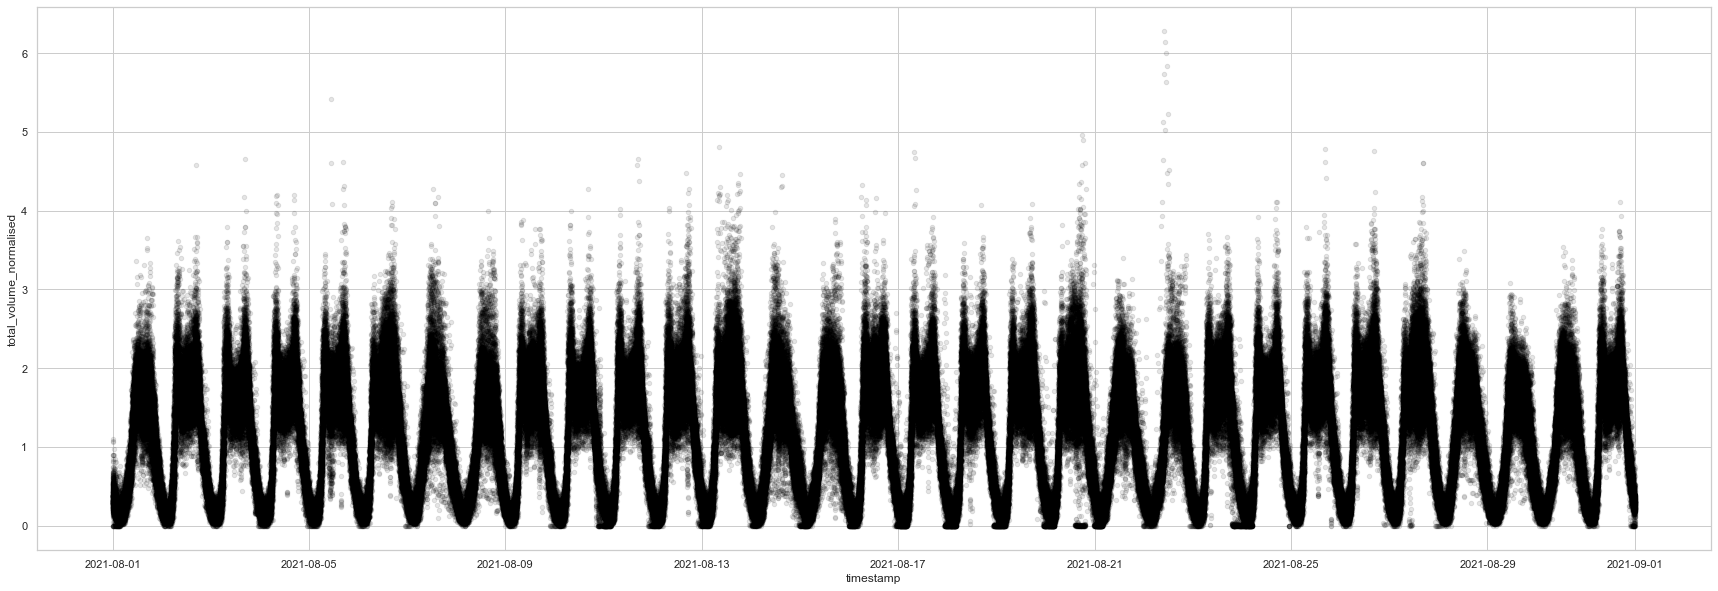

In [12]:
full_clean_report_filtered = full_clean_report.loc[full_clean_report['timestamp'].dt.to_period('M')  == '2021-08']
full_clean_report_filtered.plot('timestamp','total_volume_normalised', figsize = (30,10), kind = 'scatter', alpha=0.1, c='black')

## Check data avaliability on dates 

In [69]:
full_clean_report = pd.read_feather('traffic_reports/clean/full_clean_report')

In [13]:
# Thorpe
full_clean_report.loc[(full_clean_report.timestamp.dt.year==2022) &
                         (full_clean_report.timestamp.dt.month==3) & 
                         (full_clean_report.timestamp.dt.day==8) &
                          (full_clean_report.timestamp.dt.hour==11) &
                          (full_clean_report.time_interval == '44') &
                         (full_clean_report.site_id == '14470')]

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,...,hour,DOW,month,location,float_time,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
15878875,M3/1359A,14470,2022-03-08T00:00:00,11:14:00,44,560,125,76,84,50,...,11,1,3,thorpe,1.646738e+09,1.154343,2.271117,2.646451,2.328243,1.396798


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
# Cambridge
full_clean_report.loc[(full_clean_report.timestamp.dt.year==2021) &
                         (full_clean_report.timestamp.dt.month==11) & 
                         (full_clean_report.timestamp.dt.day==2) &
                          (full_clean_report.timestamp.dt.hour==11) &
                          (full_clean_report.time_interval == '45') &
                         (full_clean_report.site_id == '18628')]

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,location,float_time,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
11585987,A14/0930J,18628,2021-11-02T00:00:00,11:29:00,45,127,7,8,54,59,196,2021-11-02 11:29:00,11,1,11,cambridge,1.635853e+09,1.543533,4.437771,1.279087,1.83981,1.640698


In [32]:
# Epping
full_clean_report.loc[(full_clean_report.timestamp.dt.year==2022) &
                         (full_clean_report.timestamp.dt.month==3) & 
                         (full_clean_report.timestamp.dt.day==8) &
                          (full_clean_report.timestamp.dt.hour==11) &
                          (full_clean_report.time_interval == '44') &
                         (full_clean_report.site_id == '4660')]

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,location,float_time,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
18050926,M11/6275B,4660,2022-03-08T00:00:00,11:14:00,44,512,68,48,104,61,732,2022-03-08 11:14:00,11,1,3,epping,1.646738e+09,1.209968,1.959459,1.797232,2.298579,1.381633


In [41]:
# Bristol
full_clean_report.loc[(full_clean_report.timestamp.dt.year==2020) &
                         (full_clean_report.timestamp.dt.month==8) & 
                         (full_clean_report.timestamp.dt.day==8) &
                          (full_clean_report.timestamp.dt.hour==11) &
                          (full_clean_report.time_interval == '44') &
                         (full_clean_report.site_id == '3267')]

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,location,float_time,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
23757227,M5/8338A,3267,2020-08-08T00:00:00,11:14:00,44,731,128,50,50,17,959,2020-08-08 11:14:00,11,5,8,bristol,1.596885e+09,2.060138,1.88788,1.506815,1.193457,1.926832


### Plot to check all is well

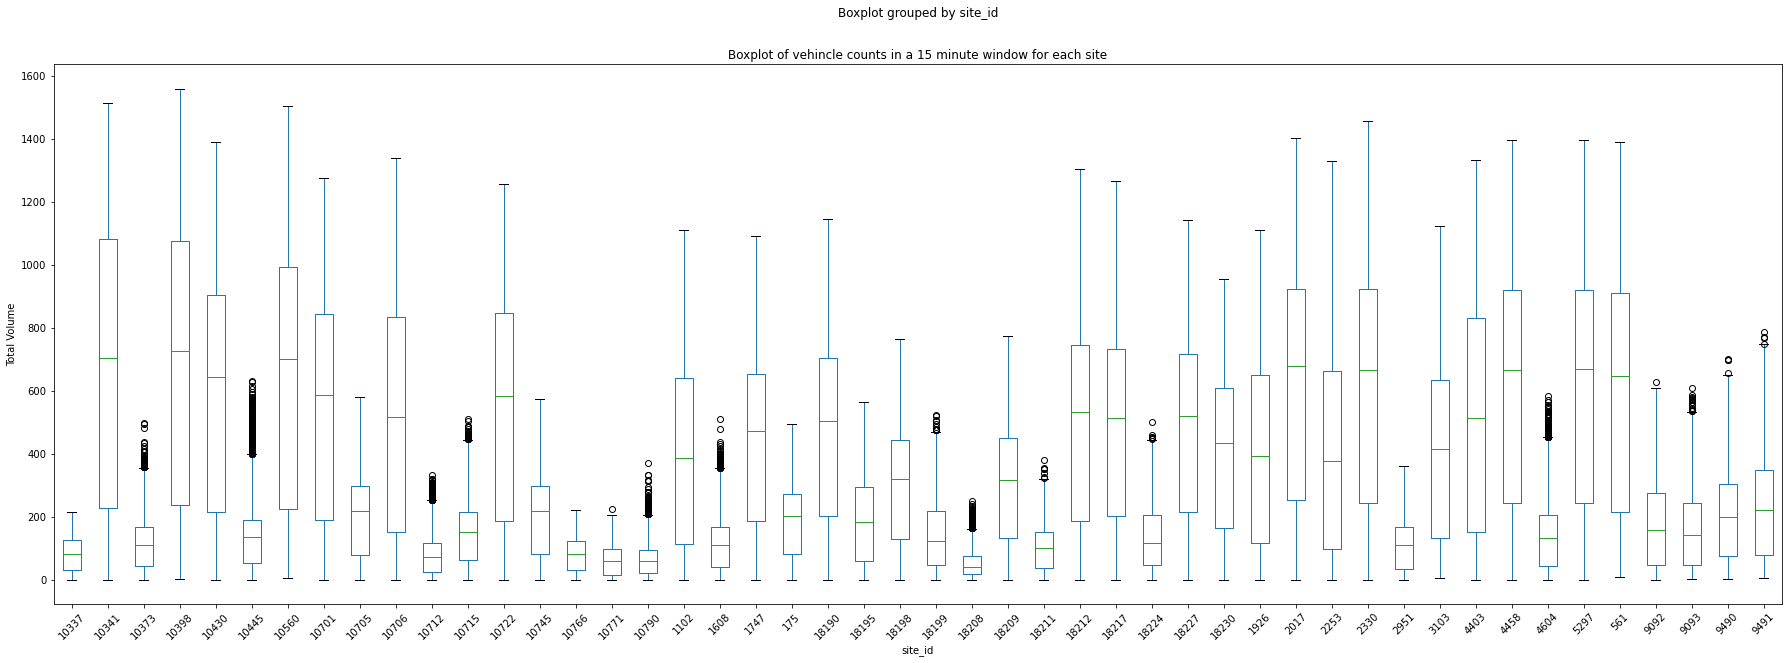

In [12]:
fig, ax = plt.subplots(figsize=(30,10))
clean_train_report_df.boxplot(column='total_volume', by = 'site_id', ax=ax, grid=False, rot=45)
ax.set_title('Boxplot of vehincle counts in a 15 minute window for each site')
ax.set_ylabel('Total Volume')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='total_volume_normalised'>

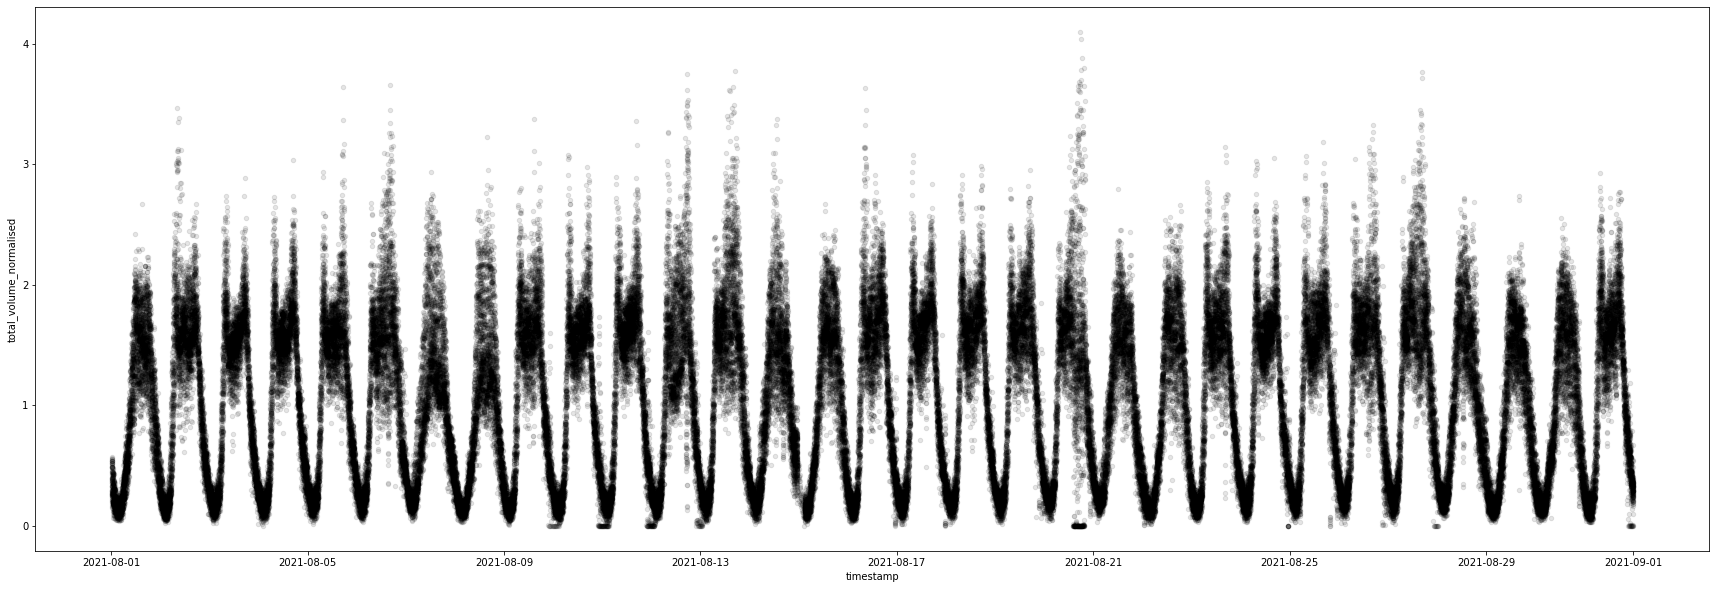

In [13]:
filterd_report = clean_train_report_df.loc[clean_train_report_df['timestamp'].dt.to_period('M')  == '2021-08']
filterd_report.plot('timestamp','total_volume_normalised', figsize = (30,10), kind = 'scatter', alpha=0.1, c='black')

<AxesSubplot:xlabel='timestamp', ylabel='total_volume_normalised'>

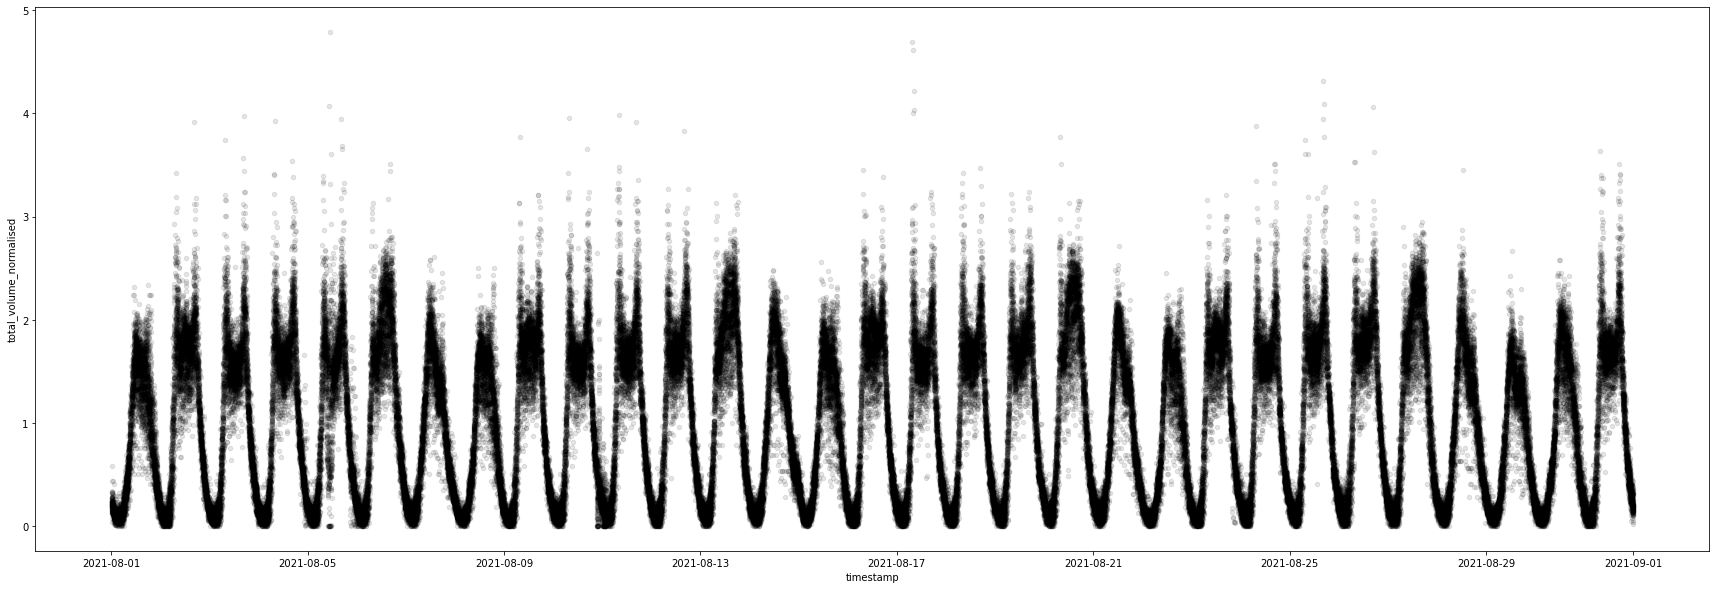

In [14]:
filterd_report = clean_test_report_df.loc[clean_test_report_df['timestamp'].dt.to_period('M')  == '2021-08']
filterd_report.plot('timestamp','total_volume_normalised', figsize = (30,10), kind = 'scatter', alpha=0.1, c='black')

In [15]:
clean_test_report_df

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,hour,DOW,month,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
3336,M11/6904A,65,2021-07-05T00:00:00,18:14:00,72,386,39,17,84,61,525,2021-07-05 18:14:00,18,0,7,2.098724,3.058174,1.863647,2.508286,2.194041
3337,M11/6904A,65,2021-07-05T00:00:00,18:29:00,73,338,27,12,69,62,446,2021-07-05 18:29:00,18,0,7,1.837743,2.117198,1.315515,2.060378,1.86389
3338,M11/6904A,65,2021-07-05T00:00:00,18:44:00,74,271,16,8,64,63,359,2021-07-05 18:44:00,18,0,7,1.473457,1.254636,0.87701,1.911075,1.500306
3339,M11/6904A,65,2021-07-05T00:00:00,18:59:00,75,236,19,11,46,64,312,2021-07-05 18:59:00,18,0,7,1.283158,1.48988,1.205889,1.373585,1.303888
3340,M11/6904A,65,2021-07-05T00:00:00,19:14:00,76,185,9,8,52,62,254,2021-07-05 19:14:00,19,0,7,1.005865,0.705733,0.87701,1.552749,1.061498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819579,M11/6914L,18858,2022-06-15T00:00:00,22:59:00,91,6,1,0,1,60,8,2022-06-15 22:59:00,22,2,6,0.188962,0.237194,0.0,1.614685,0.210895
1819580,M11/6914L,18858,2022-06-15T00:00:00,23:14:00,92,2,0,0,0,56,2,2022-06-15 23:14:00,23,2,6,0.062987,0.0,0.0,0.0,0.052724
1819581,M11/6914L,18858,2022-06-15T00:00:00,23:29:00,93,3,0,0,0,58,3,2022-06-15 23:29:00,23,2,6,0.094481,0.0,0.0,0.0,0.079086
1819582,M11/6914L,18858,2022-06-15T00:00:00,23:44:00,94,7,2,0,0,58,9,2022-06-15 23:44:00,23,2,6,0.220456,0.474389,0.0,0.0,0.237257


### Export the cleaned reports

# Normalised Flow Model

In [2]:
import numpy as np
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
full_clean_report = pd.read_feather('traffic_reports/clean/full_clean_report_norm')
clean_train_report_df = full_clean_report[full_clean_report.location != 'manchester']
clean_test_report_df  = full_clean_report[full_clean_report.location == 'manchester']

In [4]:
# Pick cols for model
cols = ['total_volume_normalised', 'hour', 'DOW', 'month']
# Train and test data are made from these
data_train = clean_train_report_df[cols]
data_test = clean_test_report_df[cols]
data_train

,total_volume_normalised,hour,DOW,month
0,0.262072,0,1,3
1,0.192543,0,1,3
2,0.155104,0,1,3
3,0.229982,0,1,3
4,0.262072,1,1,3
...,...,...,...,...
26905477,0.436910,22,4,4
26905478,0.386383,23,4,4
26905479,0.335856,23,4,4
26905480,0.297218,23,4,4


In [5]:
del full_clean_report, clean_train_report_df, clean_test_report_df

In [12]:
data_train.month

0           3
1           3
2           3
3           3
4           3
           ..
26905477    4
26905478    4
26905479    4
26905480    4
26905481    4
Name: month, Length: 20714439, dtype: object

In [16]:
df_1 = data_train.iloc[:10357219,:]

In [ ]:
# Make the model matrix and predictions
y_train, X_train = dmatrices("total_volume_normalised ~ hour*DOW", data_train)
# Create model matrix for test data
# y_test, X_test = dmatrices("total_volume_normalised ~ hour*DOW", data_test)

model = LinearRegression()
model.fit(X_train,y_train)

# Make predictions on train data
predictions_train = model.predict(X_train)
# Make predictions on test data
# predictions_test = model.predict(X_test)

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
# Plot predictions vs actual
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].scatter(predictions_train, y_train,  alpha = 0.15, c='black')
xmax = max(predictions_train)
ax[0].plot([0,xmax],[0,xmax], lw=3, c='red')
ax[0].set_title('Predicted vs Actual: Train Data')
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted')

ax[1].scatter(predictions_test, y_test,  alpha = 0.15, c='black')
xmax = max(predictions_test)
ax[1].plot([0,xmax],[0,xmax], lw=3, c='red')
ax[1].set_title('Predicted vs Actual: Test Data')
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')

plt.show()

In [39]:
clean_test_report_df.loc[:,'total_volume_normalised_predictions'] = predictions_test

/tmp/ipykernel_1719333/2494417549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_test_report_df.loc[:,'total_volume_normalised_predictions'] = predictions_test


In [40]:
clean_test_report_df

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,...,hour,DOW,month,location,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised,total_volume_normalised_predictions
4006173,M602/6006K,942,2021-08-01T00:00:00,00:14:00,0,102,9,0,0,47,...,0,6,8,manchester,0.938521,0.563293,0.000000,0.000000,0.803547,0.353968
4006174,M602/6006K,942,2021-08-01T00:00:00,00:29:00,1,63,9,2,0,48,...,0,6,8,manchester,0.579675,0.563293,0.248074,0.000000,0.535698,0.353968
4006175,M602/6006K,942,2021-08-01T00:00:00,00:44:00,2,59,6,2,1,49,...,0,6,8,manchester,0.542870,0.375528,0.248074,0.184714,0.492263,0.353968
4006176,M602/6006K,942,2021-08-01T00:00:00,00:59:00,3,48,2,2,1,49,...,0,6,8,manchester,0.441657,0.125176,0.248074,0.184714,0.383676,0.353968
4006177,M602/6006K,942,2021-08-01T00:00:00,01:14:00,4,38,12,0,0,46,...,1,6,8,manchester,0.349645,0.751057,0.000000,0.000000,0.361958,0.231273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144803,M60/9186M,17691,2021-08-31T00:00:00,22:59:00,91,14,4,0,2,48,...,22,1,8,manchester,0.247976,0.253695,0.000000,0.475965,0.238328,0.513739
10144804,M60/9186M,17691,2021-08-31T00:00:00,23:14:00,92,20,6,3,0,53,...,23,1,8,manchester,0.354251,0.380543,0.400570,0.000000,0.345575,0.339206
10144805,M60/9186M,17691,2021-08-31T00:00:00,23:29:00,93,24,4,2,0,50,...,23,1,8,manchester,0.425101,0.253695,0.267046,0.000000,0.357491,0.339206
10144806,M60/9186M,17691,2021-08-31T00:00:00,23:44:00,94,17,5,0,3,50,...,23,1,8,manchester,0.301113,0.317119,0.000000,0.713948,0.297909,0.339206


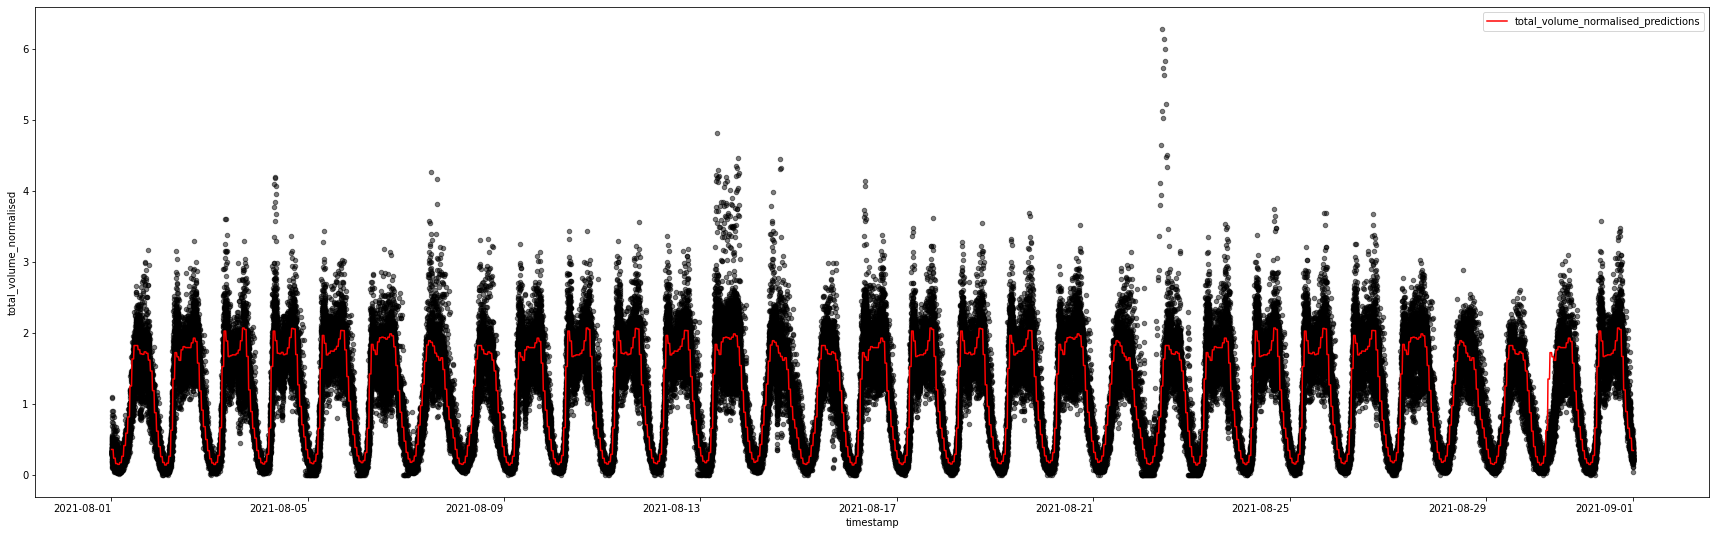

In [41]:
# Focus on particular month so we can actually see the data
filterd_report = clean_test_report_df.loc[clean_test_report_df['timestamp'].dt.to_period('M')  == '2021-08']

fig, ax = plt.subplots(figsize=(20,5))
filterd_report.plot('timestamp','total_volume_normalised_predictions', figsize = (30,10), c='red', kind='line', ax=ax)
filterd_report.plot('timestamp','total_volume_normalised', figsize = (30,10), c='black', kind='scatter', alpha=0.5, ax=ax)
plt.show()

<AxesSubplot:xlabel='timestamp'>

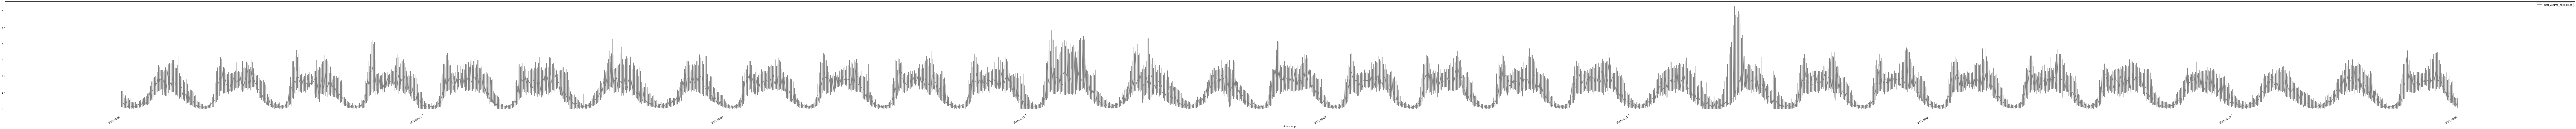

In [42]:
clean_test_report_df.plot('timestamp','total_volume_normalised', figsize = (200,10), c='black', kind='line', alpha=0.5)

In [43]:
def test_report(y_true, y_pred):
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")
    print(f"R^2: {r2_score(y_true, y_pred)}")
test_report(y_test,predictions_test)

MSE: 0.08485029183228013
MAE: 0.20082420903393136
R^2: 0.835242533188773


# Predictions on real images

In [2]:
traffic_predictions = pd.read_feather('traffic_predictions')

In [4]:
import seaborn as sns

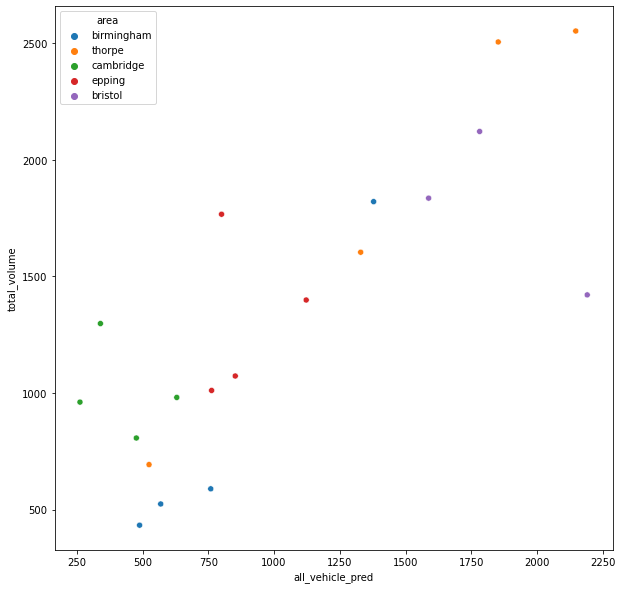

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='all_vehicle_pred', y='total_volume', hue='area', data=traffic_predictions, ax=ax)
plt.show()

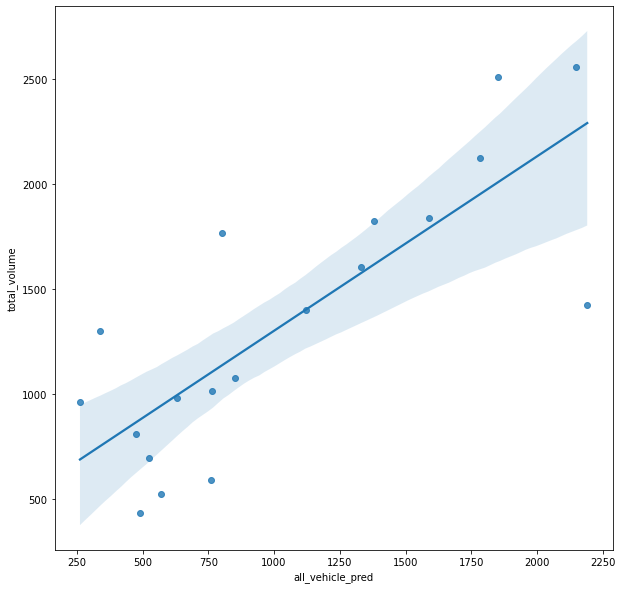

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x='all_vehicle_pred', y='total_volume', data=traffic_predictions, ax=ax)
plt.show()

In [8]:
full_clean_report = pd.read_feather('traffic_reports/clean/full_clean_report_norm')

In [20]:
traffic_predictions

,ddmmyy,time,area,focus,length,sites,filename,0-520cm,521-660cm,661-1160cm,...,pickup_truck_pred,utility_truck_pred,truck_pred,cargo_truck_pred,truck_w_box_pred,truck_tractor_pred,trailer_pred,truck_w_flatbed_pred,truck_w_liquid_pred,all_vehicle_pred
0,15/06/2021,11:09,birmingham,A452,2542.41,"9092, 9093",A452_birmingham,321,44,46,...,0.0,0.0,33.668842,0.000000,16.834421,0.0,0.000000,0.000000,0.0,488.198206
1,15/06/2021,11:09,birmingham,M6,5549.01,"18212, 19227",M6_birmingham,366,66,44,...,0.0,0.0,113.029171,16.147024,96.882147,0.0,16.147024,0.000000,0.0,758.910148
2,15/06/2021,11:09,birmingham,M42,7347.07,"10560, 10337, 10398",M42_birmingham,916,321,247,...,0.0,0.0,97.998250,39.199300,137.197549,0.0,0.000000,0.000000,0.0,1378.508712
3,15/06/2021,11:09,birmingham,A45,4559.31,"9490, 9491",A45_birmingham,395,28,66,...,0.0,0.0,104.226297,18.950236,18.950236,0.0,9.475118,0.000000,0.0,568.507077
4,08/03/2022,11:12,thorpe,M25,8613.81,"1910, 6134",M25_thorpe,1853,250,241,...,0.0,0.0,263.298122,11.702139,87.766041,0.0,0.000000,0.000000,0.0,2147.342465
5,08/03/2022,11:12,thorpe,M25_2,6190.41,"5107, 4648",M25_2_thorpe,1845,229,209,...,0.0,0.0,165.546385,7.883161,55.182128,0.0,7.883161,0.000000,0.0,1852.542885
6,08/03/2022,11:12,thorpe,M3,9400.57,"14547, 14484, 14496, 14463, 14433",M3_thorpe,438,136,80,...,0.0,0.0,90.547701,0.000000,4.765668,0.0,9.531337,0.000000,0.0,524.223531
7,08/03/2022,11:12,thorpe,M3_2,4360.48,"14437, 14470",M3_2_thorpe,1091,222,132,...,0.0,0.0,42.197189,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1329.211463
8,02/11/2021,11:26,cambridge,M11,5005.66,"2166, 3092, 4178, 9676",M11_cambridge,731,61,59,...,0.0,0.0,76.593296,8.510366,59.572564,0.0,0.000000,0.000000,0.0,629.767104
9,02/11/2021,11:26,cambridge,M11_2,3308.62,"3092, 4178",M11_2_cambridge,574,56,50,...,0.0,0.0,92.123000,0.000000,30.707667,0.0,15.353833,0.000000,0.0,475.968833


In [35]:
sites = []
for x in list(traffic_predictions.sites):
    sites = sites + x.split(', ')
    
focus_sites_report = full_clean_report[full_clean_report.site_id.isin(sites)]

In [36]:
focus_sites_report = focus_sites_report[['site_id', 'timestamp', '0-520cm', '521-660cm', '661-1160cm', '1160+cm', 'total_volume']]
focus_sites_report

,site_id,timestamp,0-520cm,521-660cm,661-1160cm,1160+cm,total_volume
1416042,9092,2019-03-19 00:14:00,13,0,2,7,22
1416043,9092,2019-03-19 00:29:00,13,0,2,10,25
1416044,9092,2019-03-19 00:44:00,5,1,1,7,14
1416045,9092,2019-03-19 00:59:00,8,0,1,8,17
1416046,9092,2019-03-19 01:14:00,13,2,2,5,22
...,...,...,...,...,...,...,...
26488781,6041,2022-03-29 10:44:00,509,83,90,87,768
26488782,6041,2022-03-29 10:59:00,495,107,89,101,792
26488783,6041,2022-03-29 11:14:00,471,128,84,94,777
26488784,6041,2022-03-29 11:29:00,498,117,84,83,782


In [54]:
def get_aadts(x):
    aadt_report = focus_sites_report[(focus_sites_report.timestamp.dt.year==int(x.ddmmyy.split('/')[-1]))  & (focus_sites_report.site_id.isin(x.sites.split(', ')))].groupby('timestamp').sum().mean()
    return list(aadt_report)

In [53]:
get_aadts(x)

0-520cm         250.110671
521-660cm        20.469604
661-1160cm       19.474248
1160+cm          15.110963
total_volume    305.165227
dtype: float64

In [55]:
traffic_predictions['aadt_report'] = traffic_predictions.apply(get_aadts, axis=1)

In [61]:
traffic_predictions['total_volume_aadt'] = traffic_predictions.apply(lambda x : x.aadt_report[-1] * 4 * 24, axis=1) # times by 4*24 to convert average 15 min into average daily

In [71]:
traffic_predictions[traffic_predictions.ddmmyy != '08/03/2022']

,ddmmyy,time,area,focus,length,sites,filename,0-520cm,521-660cm,661-1160cm,...,truck_pred,cargo_truck_pred,truck_w_box_pred,truck_tractor_pred,trailer_pred,truck_w_flatbed_pred,truck_w_liquid_pred,all_vehicle_pred,aadt_report,total_volume_aadt
0,15/06/2021,11:09,birmingham,A452,2542.41,"9092, 9093",A452_birmingham,321,44,46,...,33.668842,0.000000,16.834421,0.0,0.000000,0.0,0.0,488.198206,"[250.11067090991753, 20.469604468402935, 19.47...",29295.861791
1,15/06/2021,11:09,birmingham,M6,5549.01,"18212, 19227",M6_birmingham,366,66,44,...,113.029171,16.147024,96.882147,0.0,16.147024,0.0,0.0,758.910148,"[320.4127097041911, 30.458918726658368, 19.459...",42475.948070
2,15/06/2021,11:09,birmingham,M42,7347.07,"10560, 10337, 10398",M42_birmingham,916,321,247,...,97.998250,39.199300,137.197549,0.0,0.000000,0.0,0.0,1378.508712,"[688.2589184276301, 170.12897636900703, 114.95...",108984.417178
3,15/06/2021,11:09,birmingham,A45,4559.31,"9490, 9491",A45_birmingham,395,28,66,...,104.226297,18.950236,18.950236,0.0,9.475118,0.0,0.0,568.507077,"[329.2453430656934, 19.143649635036496, 18.780...",37061.280701
8,02/11/2021,11:26,cambridge,M11,5005.66,"2166, 3092, 4178, 9676",M11_cambridge,731,61,59,...,76.593296,8.510366,59.572564,0.0,0.000000,0.0,0.0,629.767104,"[576.247859344674, 32.67316474483388, 25.33762...",68073.327092
9,02/11/2021,11:26,cambridge,M11_2,3308.62,"3092, 4178",M11_2_cambridge,574,56,50,...,92.123000,0.000000,30.707667,0.0,15.353833,0.0,0.0,475.968833,"[448.34104211277656, 30.00256959314775, 23.124...",55066.657987
10,02/11/2021,11:26,cambridge,A14,4662.76,"18577, 18594",A14_cambridge,665,40,91,...,76.263844,0.000000,10.894835,0.0,0.000000,0.0,0.0,261.476036,"[485.1444317532838, 22.240748143917763, 34.456...",60313.992918
11,02/11/2021,11:26,cambridge,A14_2,5764.49,"18841, 18628, 18676",A14_2_cambridge,877,51,104,...,89.282255,0.000000,44.641128,0.0,0.000000,0.0,0.0,339.272569,"[484.34718533116273, 18.438237226173136, 33.65...",61381.247879
16,08/08/2020,11:08,bristol,M4,8535.34,"6041, 5311",M4_bristol,1471,226,80,...,32.336146,3.233615,29.102531,0.0,3.233615,0.0,0.0,1587.704766,"[634.6150341685649, 140.29538724373577, 68.215...",89114.451936
17,08/08/2020,11:08,bristol,M4_2,4997.57,"5610, 1897, 5994",M4_2_bristol,1284,58,40,...,37.138049,0.000000,27.853537,0.0,0.000000,0.0,0.0,2191.144896,"[412.7233302940506, 38.28347959881468, 31.4961...",52753.343059
